# Here is presented the first exploration on the [Stanford dogs dataset](http://vision.stanford.edu/aditya86/ImageNetDogs/)



[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Jeremynadal33/classify_stanford_dogs/blob/master/pexploration.ipynb)

It also downloads the dataset if needed


In [81]:
import cv2
import os 
import cv2
import matplotlib.pyplot as plt 
import numpy as np
import tarfile
import requests

In [2]:
if 'google.colab' in str(get_ipython()):
  print('Running on CoLab')
  from google.colab import drive
  drive.mount('/content/gdrive',force_remount=True)
  
  root_dir = '/content/gdrive/My Drive/Formation-OC/P6-Images/'
  input_dir = root_dir + 'inputs/'
  png_dir = root_dir + 'pngs/'

  #my script
  !ls gdrive/MyDrive/Formation-OC/P6-Images/
else:
  print('Not running on CoLab')
  #my script
  root_dir = '/Users/jeremynadal/Documents/Formation OC IML/P6/'
  input_dir = root_dir + 'inputs/'
  png_dir = root_dir + 'pngs/'
  model_dir = root_dir +'models/'

Running on CoLab
Mounted at /content/gdrive
inputs	models	P6-presentation.pptx  pngs
inputs	models	P6-presentation.pptx  pngs


In [52]:
def download_from_url(url, target_path = 'inputs/', keep_download = True, overwrite_download = False):
  '''Download file or data from url. 
  url (string): path to dataset
  target_path (string, optional): directory path to write download data. Default is inputs/
  keep_download (boolean, optional): wether to keep the the download file after extraction. Default is True
  overwrite_download (boolean, optional): wether to overwrite the file if it exists. Default is False.'''

  assert url != '' and url != None, 'Please, enter correct url'
  
  filename = os.path.basename(url)
  file_location = target_path + filename

  os.makedirs(target_path, exist_ok=True)
 
  if os.path.exists(file_location) and not overwrite_download:
    print("File already exists at {}. Use: 'overwrite_download=True' to overwrite download".format(file_location))
    tarf = tarfile.open(file_location, 'r')
    tarf.extractall(target_path)
    tarf.close()
		
    return
  print('Downloading file from {} to {}.'.format(url,file_location))
	# Download
  with open(file_location, 'wb') as f:
    with requests.get(url, allow_redirects=True, stream=True) as resp:
      for chunk in resp.iter_content(chunk_size = 512):  #chunk_size in bytes
        if chunk:
          f.write(chunk)

  print("Finished downloading.")
  print("Extracting the file now ...")
  tarf = tarfile.open(file_location, 'r')
  tarf.extractall(target_path)
  tarf.close()
  
  if not keep_download:
    os.remove(file_location)


  return '1'

url = 'http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar'
#url = 'http://www.sbeams.org/sample_data/Microarray/External_test_data.tar.gz'

#download_from_url(url, target_path=input_dir)


In [59]:
species = os.listdir(input_dir+'sep_images/train')

## Lets see how many images and classes we have

In [ ]:
species = os.listdir(input_dir+'Images/')
species = [specie for specie in species if specie !='.DS_Store']
print('There are {} different species'.format(len(species)))

There are 120 different species


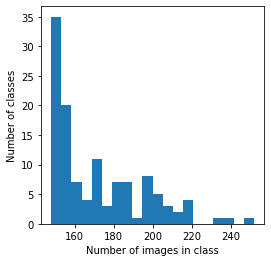

In [ ]:
nb_img = [len(os.listdir(input_dir+'Images/'+specie)) for specie in species ]
plt.figure(figsize=(4,4))
plt.hist(nb_img,bins=20)
plt.xlabel('Number of images in class')
plt.ylabel('Number of classes')

plt.savefig(png_dir+'nb_class.png')
plt.show()

print('In total, there is {} images'.format(np.sum(nb_img)))

## Lets see what size the images are

In [78]:
# List all imgs
imgs = []
for specie in species :
  for file in os.listdir(input_dir+'sep_images/train/'+specie):
    imgs.append(input_dir+'sep_images/train/'+specie+'/'+file)
  
  for file in os.listdir(input_dir+'sep_images/validation/'+specie):
    imgs.append(input_dir+'sep_images/validation/'+specie+'/'+file)

In [ ]:
# List all imgs
imgs = []
for specie in species :
  for file in os.listdir(input_dir+'Images/'+specie):
    imgs.append(input_dir+'Images/'+specie+'/'+file)
  

In [ ]:
sizes = [cv2.imread(img,1).shape[:-1] for img in imgs]

In [ ]:
print(len(sizes))

In [ ]:
test = [(2,2),(4,4)]
print(np.mean(test))

In [ ]:
import imagesize

width, height = imagesize.get(imgs[0])

## Lets separate the images between train and test directories

In [ ]:
def create_train_val_rep(img_dir, output_dir, validation_split=0.3, random_seed = 42 ):
    '''Create repertories and put train and validation into them. Careful, the images must already be in separate folders into an Image rep.
    input_dir (str): the path where to create the baseline directory
    species (list(str)): the list of directories to take and split into train and validation
    validation split (float, optional): proportion of img to take as validation. Default is 0.3.'''
    
    assert os.path.exists(img_dir), 'img_dir doesnot exists'

    if img_dir[-1] != '/' : img_dir += '/'
    if output_dir[-1] != '/' : output_dir += '/'
    
    species = os.listdir(img_dir)

    for specie in species :
      assert os.path.isdir(img_dir+specie), 'Images must be in separate directories'
    
    assert not os.path.exists(output_dir), 'baseline_inputs already exists, consider removing it first'
    
    np.random.seed(random_seed)
    os.mkdir(output_dir)
    os.mkdir(output_dir+'train')
    os.mkdir(output_dir+'validation')
    i = 1
    for specie in species:
        os.mkdir(output_dir+'train/'+specie)
        os.mkdir(output_dir+'validation/'+specie)
        
        img_names = os.listdir(img_dir+specie)
        img_train, img_validation = train_test_split(img_names, test_size=validation_split, random_state=random_seed)
        print('For the {}th class: {}, there is {} training images and {} validation images'.format(i, specie.split('-')[1],len(img_train),len(img_validation)))
        i += 1
        for img in img_train :
            shutil.copy(img_dir+specie+'/'+img, output_dir+'train/'+specie )
        for img in img_validation :
            shutil.copy(img_dir+specie+'/'+img, output_dir+'validation/'+specie )

create_train_val_rep(input_dir+'Images/',input_dir+'sep_images/')